In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Perlin Noise
## By Stilyan Chanev

## Abstract
Perlin noise is a mathematical algorithm developed by Ken Perlin in the 1980s to generate smooth, natural-looking random patterns. Unlike random noise, Perlin noise creates continuous, organic textures. Widely used in computer graphics, it allows the creation of realistic terrain, weather patterns, and textures. This article explores the underlying concepts of Perlin noise and its mathematical foundations.

### Getting to know noise

So what is noise? In simple words, noise is just some random values. For example, white noise - everything is random,
the pixels are randomply placed and totally unrelated to each other. Below I present a white noise image:

![White noise](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/White-noise-mv255-240x180.png/220px-White-noise-mv255-240x180.png)

In [2]:
def generate_binary_white_noise(size):
    """
    A function which generates white noise according to a square grid size
    """
    noise = np.random.choice([0, 1], size=(size, size))
    return noise

In [3]:
def show_white_noise(size, color_scheme, interpolation):
    """
    A function to display white noise
    """
    noise = generate_binary_white_noise(size)
    
    plt.imshow(noise, cmap=color_scheme, interpolation=interpolation)
    plt.title("Binary White Noise")
    plt.axis('off') 
    plt.show()

Now we will invoke the function with different sizes, colors and types of interpolations:

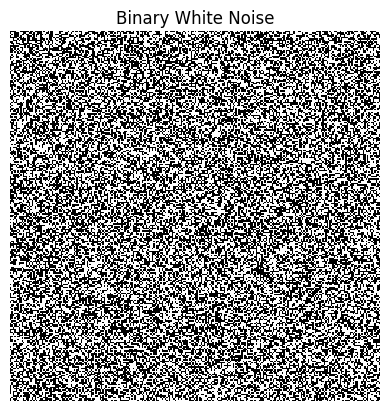

In [4]:
show_white_noise(256, 'gray', 'nearest')

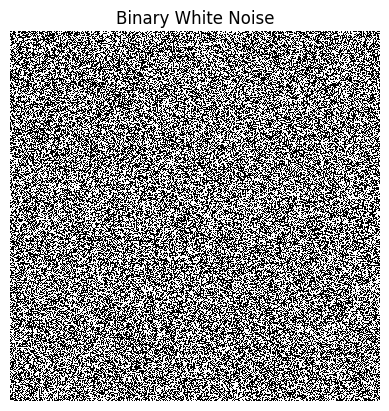

In [5]:
show_white_noise(512, 'gray', 'nearest')

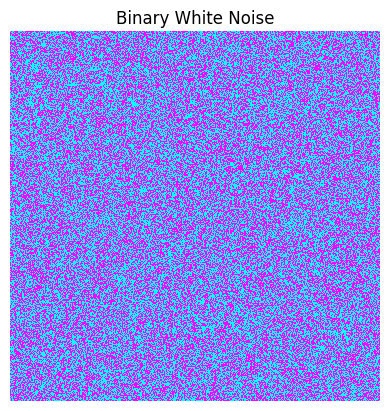

In [6]:
show_white_noise(1024, 'cool', 'nearest')

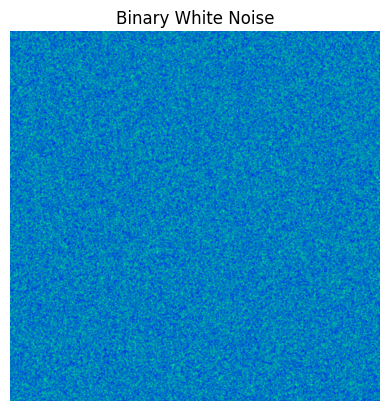

In [7]:
show_white_noise(1024, 'winter', 'bicubic')

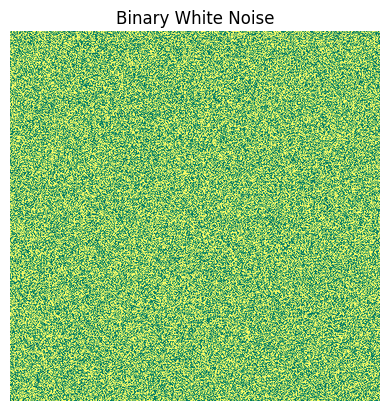

In [8]:
show_white_noise(512, 'summer', 'lanczos')

After we saw different visualizations of white noise, we can continue with our main topic - Perlin Noise.

Types of noise (like Perlin Noise) are not purely random (like white noise). Smoke, clouds, terrain, etc. are not randomply displayed, they are created by a collection of complex interactions between a lot of tiny particles. In order to display terrains and beautiful structures, we need something more complex - Perlin Noise.

### Perlin Noise - History

There is an algorithm that results in more natural results - and that's know as "Perlin Noise". It was developed by Ken Perlin in the early 1980s when he was working on the originial Tron movie. He used it to create different textures for the movie. In 1977, he won an Acadeny Award in technical achievement for his discovery.

![Ken Perlin](https://tisch.nyu.edu/content/dam/tisch/itp/Faculty/ken-perlin.jpg.preset.square.jpeg?)
![Perlin Noise](https://upload.wikimedia.org/wikipedia/commons/8/88/Perlin_noise_example.png)

### Basic Algorithm overview

Imagine we have a multi-dimensional space (for example, a grid). The Perlin Noise function uses a hash function to map input coordinates of points to gradient vectors. Then, they are interpolated, and in this way, the image looks non-chaotic.

2 key factors include frequency and amplitude.

#### Frequency
Controls how often the noise values change - it is $$ \frac{1}{wavelength} $$ - the distance from one function peak to another.

#### Amplitude
The height of the function - it controls the magnitude of the noise.

After we have understood frequency and amplitude, we could talk about the components of the algorithm:

1) Noise Function (NF) - a seeded random number generator that, unlike basic random generators, produces the same value when given the same input. In this way the noise function behaves consistently.
2) Interpolation Function (IF) - it smooths out transitions between noise values so that the noise is continuous. In this way, the noise would look smoother and more eye-appealing.

#### Octaves
Octaves are a very important part of the Perlin Noise algorithm. Multiple octaves are added together so that our noise looks more realistic and detailed. When we create different octaves, each one is with increased frequency and decreased amplitude. This term is connected with music, where each successive octave doubles in frequency.

#### Key steps for the algorithm

1) Permutations table - we create a random array of integers to ensure the randomness of the noise.
2) Gradient Vectors - at each point, we assign a random gradient vector
3) Dot Products between Vectors - we need to evaluate the dot products between the gradient vectors and the distance vectors from the current point to the point's grid corners
4) Interpolation - we need to interpolate between the dot products so that we have a smooth transition

### Mathematical Details

#### Grid 

We define a n-dimensional grid, where for each grid intersection there is a fixed random gradient vector

![Grid](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/PerlinNoiseGradientGrid.svg/1920px-PerlinNoiseGradientGrid.svg.png)

#### Coordinates

The input coordinates will be $ (x, y) $ - these are the coordinates of the current point.
The grid coordinates will be $ (x_i, y_i) $ - these are the integer parts of the input coordinates, which are the grid points closest to the input ones.
$$ x_i = \lfloor x \rfloor \ $$
$$ y_i = \lfloor y \rfloor \ $$
The interval coordinates will be $ (x_f, y_f) $ - these are the fractional parts of the input coordinates, which determine the distance from the input point from the closest grid.

$$ x_f = x - x_i $$
$$ y_f = y - y_i $$

#### Fade function

The fade function helps to make a smooth transition between points. This function reduces the abrupt places - it is applied to $ x_f $ and $ y_f $.

$$ f(t) = t^3.(t.(6.t - 15) + 10) $$

#### Gradient function

For each four corners of our grid cell, we need to compute the gradient at that point. For a given point ($ x_i $, $ y_i $), we generate a random gradient vector based on the permutation table we talked about earlier. Each gradient is generated randomly, but once we set them, they remain permanent to their coordinates.

$$ g(x_{grid}, y_{grid}) = (g_x, g_y) $$

![Gradient func](https://web.archive.org/web/20170201233642im_/https://mzucker.github.io/html/images/gradients.gif)

Also, for each point, we generate a vector from the grid point to $ (x, y) $

![Vector grid](https://web.archive.org/web/20170201233642im_/https://mzucker.github.io/html/images/cornervectors.gif)

After summing the dot products of each gradient and the vector going from its associated grid point to $ (x, y) $ we have computed the gradients at the four corners of the grid.

#### Linear Interpolation

We use this function (lerp) to blend the gradients together.

$$ lerp(a,b,t) = a + t.(b - a) $$

Here is the final function:

In [9]:
def perlin(x, y, seed=0):
    """ 
    Main Perlin Noise Function    
    """
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    
    xi, yi = x.astype(int), y.astype(int)
   
    xf, yf = x - xi, y - yi
    
    u, v = fade(xf), fade(yf)
    
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)
    return lerp(x1, x2, v)

def lerp(a, b, x):
    """ 
    Linear interpolation function
    """
    return a + x * (b - a)

def fade(t):
    """
    Fade function
    """
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    """
    Gradient function working with dot products
    """
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

In [10]:
def draw_perlin_noise(grid_size, octaves, frequency_scale, seed, colour_scheme):
    """
    Draw function to display perlin noise
    """
    p = np.zeros(grid_size)
    
    for i in range(octaves):
        freq = frequency_scale ** i
        
        lin = np.linspace(0, freq, grid_size[0], endpoint=False)
        x, y = np.meshgrid(lin, lin)
        
        p += perlin(x, y, seed=seed + i) / freq

    plt.imshow(p, cmap=colour_scheme, origin='upper')
    plt.colorbar()
    plt.show()

Now, lets display multuple grids!

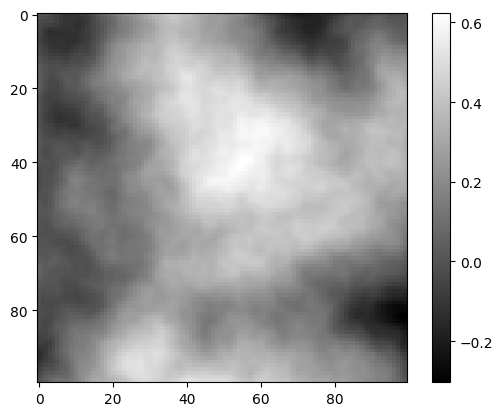

In [11]:
draw_perlin_noise((100, 100), 6, 2, 120, 'gray')

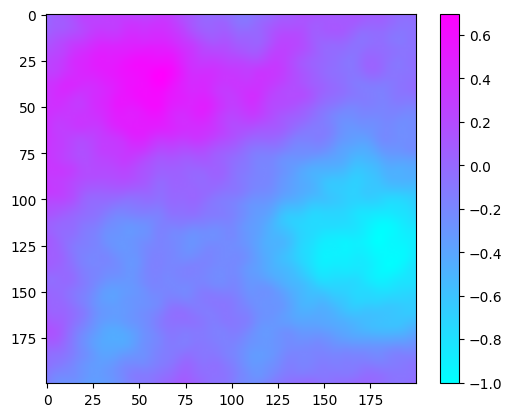

In [12]:
draw_perlin_noise((200, 200), 8, 1.5, 100, 'cool')

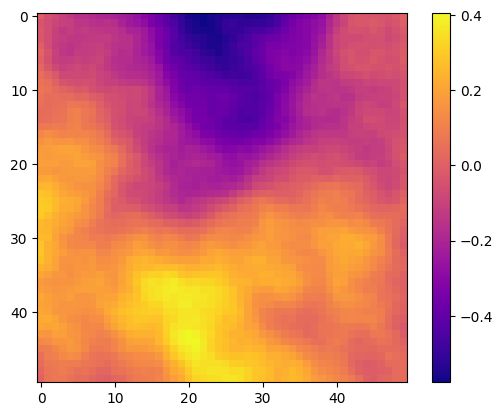

In [13]:
draw_perlin_noise((50, 50), 4, 3, 42, 'plasma')

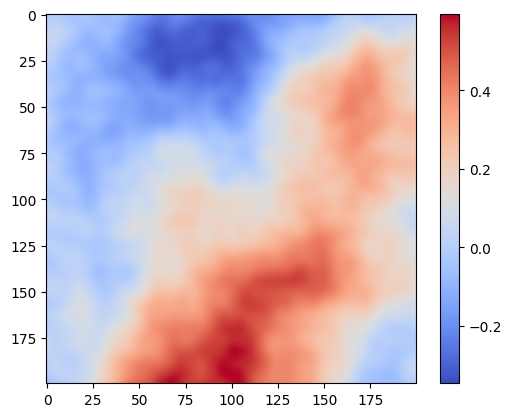

In [14]:
draw_perlin_noise((200, 200), 4, 2.5, 500, 'coolwarm')

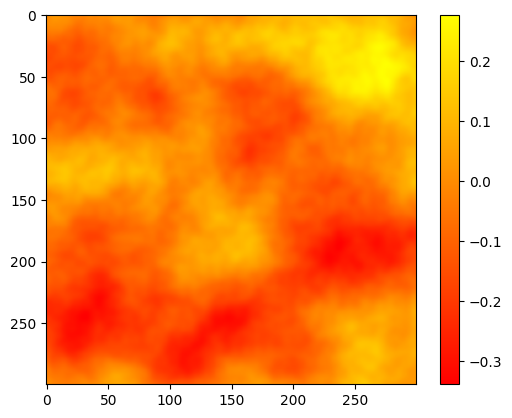

In [15]:
draw_perlin_noise((300, 300), 6, 2, 1234, 'autumn')

## Conclusion

Perlin Noise is a powerful tool, with which we can create interesting and beautiful terrains widely used in game development and computer graphics. With understanding of the algorithm developers can create stunning visual effects.

## Used Literature

https://en.wikipedia.org/wiki/Perlin_noise

https://web.archive.org/web/20160530124230/http://freespace.virgin.net/hugo.elias/models/m_perlin.htm

https://thebookofshaders.com/11/

https://www.youtube.com/watch?v=7fd331zsie0

https://www.youtube.com/watch?v=oo9HFnDdviw

https://web.archive.org/web/20170201233641/

https://mzucker.github.io/html/perlin-noise-math-faq.html